¡Hola, Bruno!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola Bruno! Tu trabajo es excelente, solo te hice un par de recomendaciones mínimas para mejorar algunas visualizaciones y te dejé un comentario acerca de un filtro que te faltó para usar los datos requeridos en la prueba de hipótesis. Una vez hayas atendido este último comentario principalmente, tu proyecto quedará aprobado. Quedo pendiente de tus dudas y comentarios.
</div>

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 2</b> <a class="tocSkip"></a>

Hola Bruno! Tu trabajo es excelente con los ajustes. Desarrollaste de manera perfecta la prueba de levene para mostrar el supueto de varianzas iguales, 
    
Sigue con el excelente trabajo!    
</div>

## Proyecto 4 y 5 ##

En este análisis se llevará a cabo un estudio exploratorio de datos sobre el servicio de taxis en Chicago, utilizando dos conjuntos de datos principales: uno que contiene información sobre el número de viajes por compañía de taxis durante el 15 y 16 de noviembre de 2017, y otro que muestra el promedio de viajes que finalizaron en diferentes barrios de Chicago durante noviembre de 2017. El objetivo principal es identificar patrones en la distribución de viajes, determinar las compañías más activas y los barrios con mayor demanda, así como crear visualizaciones efectivas que permitan comunicar estos hallazgos de manera clara y concisa.

Además, se realizará una prueba de hipótesis específica para determinar si las condiciones climáticas afectan la duración de los viajes entre el Loop y el Aeropuerto Internacional O'Hare durante los sábados. Este análisis utilizará un tercer conjunto de datos que incluye información sobre la hora de inicio del viaje, las condiciones climáticas y la duración del trayecto. Se establecerá un nivel de significación apropiado y se explicará detalladamente tanto el planteamiento de las hipótesis como los criterios utilizados para probarlas, con el fin de obtener conclusiones significativas sobre el impacto del clima en los tiempos de viaje.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Configuración para visualización
plt.style.use('seaborn')
pd.set_option('display.max_columns', None)

# Cargar los datasets
taxi_companies = pd.read_csv('/datasets/project_sql_result_01.csv')
neighborhoods = pd.read_csv('/datasets/project_sql_result_04.csv')
trips_loop_ohare = pd.read_csv('/datasets/project_sql_result_07.csv')


In [2]:
# Examinar los datos
print("Información del dataset de compañías de taxis:")
print(taxi_companies.info())
print("\nPrimeras filas:")
print(taxi_companies.head())

print("\nInformación del dataset de barrios:")
print(neighborhoods.info())
print("\nPrimeras filas:")
print(neighborhoods.head())

Información del dataset de compañías de taxis:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

Primeras filas:
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

Información del dataset de barrios:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips    

<div class="alert alert-block alert-warning">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Recuerda que como buena prática es recomendable cargar todas las bases de datos en una misma celda. Es por ello que te recomiendo cargar la base faltante en esta misma celda..</div>





<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

Se realizó la carga de la base de datos

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

Antes de proceder con las pruebas de hipótesis y el análisis final, es necesario asegurar que los datos no estén sesgados por información repetida.

In [3]:
# Analizar registros duplicados en taxi_companies
duplicates_taxi_companies = taxi_companies.duplicated().sum()
print("Registros duplicados en taxi_companies:", duplicates_taxi_companies)

# Analizar registros duplicados en neighborhoods
duplicates_neighborhoods = neighborhoods.duplicated().sum()
print("Registros duplicados en neighborhoods:", duplicates_neighborhoods)

# Analizar registros duplicados en trips_loop_ohare
duplicates_trips_loop_ohare = trips_loop_ohare.duplicated().sum()
print("Registros duplicados en trips_loop_ohare:", duplicates_trips_loop_ohare)


Registros duplicados en taxi_companies: 0
Registros duplicados en neighborhoods: 0
Registros duplicados en trips_loop_ohare: 197


Al detectar 197 registros duplicados en el conjunto de datos de trips_loop_ohare, resulta pertinente eliminarlos para conservar únicamente la información original de cada viaje. Esta acción garantiza que nuestro análisis estadístico se base en datos únicos y representativos, reduciendo el riesgo de obtener resultados distorsionados.

In [4]:
# Eliminar registros duplicados en el dataset trips_loop_ohare
trips_loop_ohare.drop_duplicates(inplace=True)

# Verificar que los duplicados hayan sido eliminados
duplicates_trips_loop_ohare_after = trips_loop_ohare.duplicated().sum()
print("Registros duplicados en trips_loop_ohare después de eliminar:", duplicates_trips_loop_ohare_after)


Registros duplicados en trips_loop_ohare después de eliminar: 0


Tras la eliminación de los duplicados, verificamos que el conjunto de datos trips_loop_ohare ya no presente registros repetidos. Esto nos asegura que el análisis posterior, incluyendo la prueba de hipótesis sobre la duración de los viajes en condiciones climáticas adversas, se lleve a cabo sobre datos limpios y confiables, mejorando así la validez de nuestras conclusiones.

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Te recomiendo en este análisis inicial hacer un análisis de reigstros duplicados


<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el analisis de duplicados

Se analizaron dos conjuntos de datos relacionados con el servicio de taxis en Chicago. El primer dataset contiene información sobre 64 compañías de taxis diferentes, mostrando el nombre de la empresa y la cantidad de viajes realizados durante el 15 y 16 de noviembre de 2017. Entre estas compañías, Flash Cab lidera con 19,558 viajes, seguida por Taxi Affiliation Services con 11,422 viajes, Medallion Leasing con 10,367 viajes, Yellow Cab con 9,888 viajes y Taxi Affiliation Service Yellow con 9,299 viajes.

El segundo dataset presenta información sobre 94 barrios de Chicago, incluyendo el nombre del barrio y el promedio de viajes que finalizaron en cada uno durante noviembre de 2017. Los datos revelan que el Loop es el destino más popular con un promedio de 10,727.47 viajes, seguido por River North con 9,523.67 viajes, Streeterville con 6,664.67 viajes, West Loop con 5,163.67 viajes y O'Hare con 2,546.90 viajes promedio.

El análisis inicial de los datos muestra que ambos datasets están completos, sin valores nulos y con tipos de datos apropiados para cada columna (object/string para nombres y numeric para cantidades). Las columnas numéricas están en formatos adecuados: números enteros (int64) para los conteos exactos de viajes en el primer dataset y números decimales (float64) para los promedios en el segundo dataset, lo que facilita futuros análisis estadísticos y visualizaciones.

La siguiente etapa del análisis se centrará en identificar los 10 barrios con mayor promedio de finalización de viajes. Esta selección nos permitirá comprender qué zonas de la ciudad tienen una demanda más elevada de taxis, lo que podría asociarse a actividades económicas, turísticas o residenciales. Al destacar estos barrios, podremos posteriormente visualizar sus datos y profundizar en las razones que impulsan su popularidad, contribuyendo así a una toma de decisiones más informada, ya sea para mejorar la planificación del servicio de transporte o para comprender el comportamiento de la movilidad urbana.

In [5]:
# Identificar los 10 principales barrios en términos de finalización del recorrido
top_10_neighborhoods = neighborhoods.sort_values(by='average_trips', ascending=False).head(10)
print("\nTop 10 barrios en términos de finalizaciones de viajes:")
print(top_10_neighborhoods)



Top 10 barrios en términos de finalizaciones de viajes:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


Los datos muestran que el barrio del Loop destaca marcadamente sobre el resto, con más de 10,700 viajes promedio finalizados. Este resultado es coherente con la relevancia económica y turística del centro de Chicago, donde se concentran oficinas, comercios, atracciones culturales y una gran afluencia de personas. Le siguen River North y Streeterville, barrios que también son conocidos por su actividad comercial, hotelera y de ocio, lo que explica el alto volumen de viajes.

Por su parte, West Loop y O'Hare, con promedios de alrededor de 5,163 y 2,546 viajes respectivamente, indican la importancia de zonas emergentes en desarrollo gastronómico y cultural (como West Loop) y de núcleos de transporte internacional (como el Aeropuerto O'Hare) para la movilidad urbana. El resto de los barrios del top 10, si bien con menores cifras, mantiene un flujo de viajes considerable, reforzando la idea de que la demanda de taxis no solo se concentra en el centro de la ciudad, sino también en áreas con perfiles residenciales, educativos y recreativos.

En esta fase del análisis, se crearán visualizaciones en forma de gráficos de barras para ilustrar dos aspectos clave: el número de viajes realizados por cada compañía de taxis y el promedio de viajes que finalizan en los 10 barrios más demandados. Estas representaciones gráficas facilitarán la comprensión de las diferencias en el nivel de actividad entre empresas, así como la identificación de las zonas más concurridas. A partir de estas visualizaciones, será posible extraer conclusiones más precisas sobre la dinámica del servicio de taxis en la ciudad

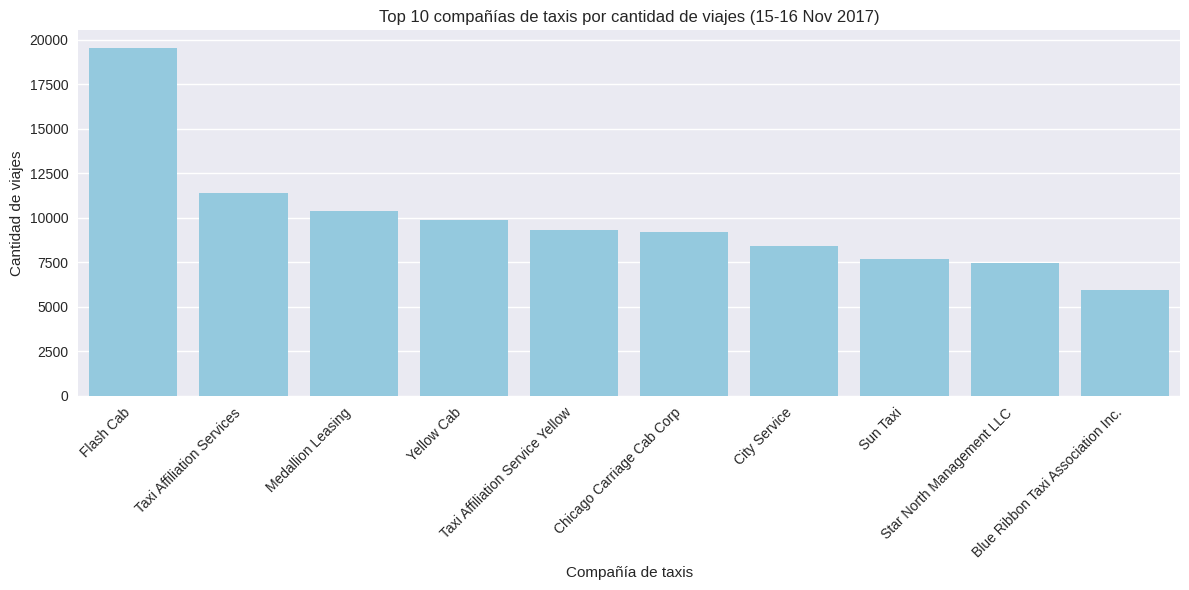

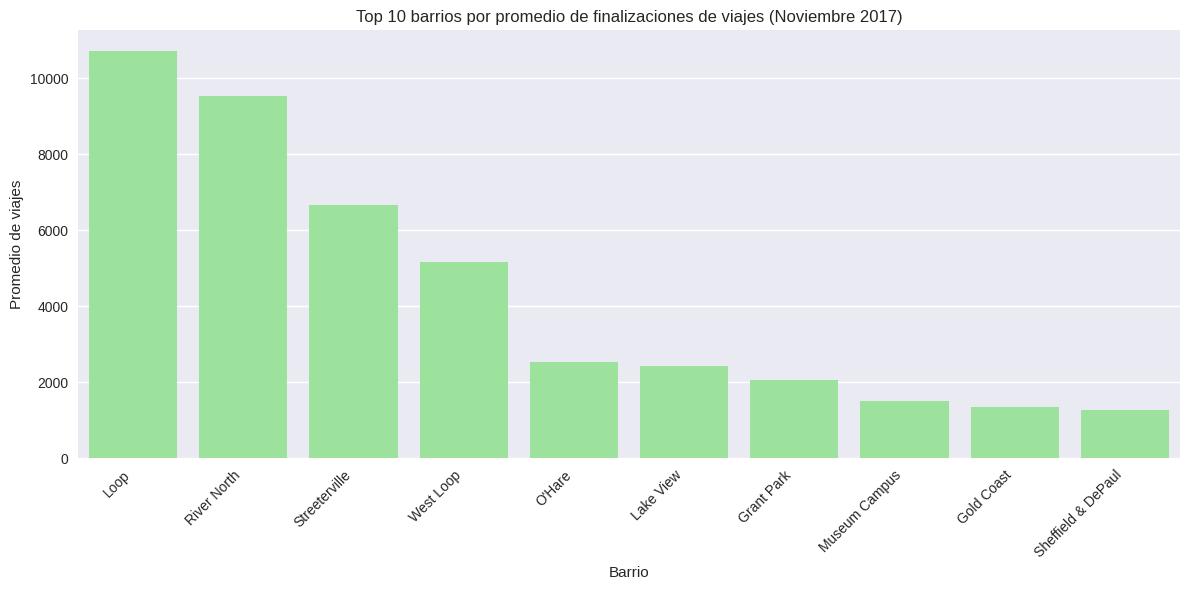

In [6]:
# Seleccionar el top 10 de compañías de taxis con más viajes
top_10_companies = taxi_companies.sort_values(by='trips_amount', ascending=False).head(10)

# Seleccionar el top 10 de barrios con más promedio de finalizaciones de viajes
top_10_neighborhoods = neighborhoods.sort_values(by='average_trips', ascending=False).head(10)

# Gráfico de barras: top 10 compañías de taxis con más viajes
plt.figure(figsize=(12, 6))
sns.barplot(x='company_name', y='trips_amount', data=top_10_companies, color='skyblue')
plt.title('Top 10 compañías de taxis por cantidad de viajes (15-16 Nov 2017)')
plt.xlabel('Compañía de taxis')
plt.ylabel('Cantidad de viajes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gráfico de barras: top 10 barrios por mayor promedio de finalizaciones
plt.figure(figsize=(12, 6))
sns.barplot(x='dropoff_location_name', y='average_trips', data=top_10_neighborhoods, color='lightgreen')
plt.title('Top 10 barrios por promedio de finalizaciones de viajes (Noviembre 2017)')
plt.xlabel('Barrio')
plt.ylabel('Promedio de viajes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el desarrollo de este análisis, muestras de manera clara cuales son los 10 principales barrios en términos de finalización del recorrido
    </div>

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el desarrollo de este análisis y lo complementaste con una gráfica.
    </div>

Los gráficos muestran claramente cómo, entre las compañías de taxis, Flash Cab sobresale con una diferencia significativa en el número de viajes realizados durante el periodo del 15 al 16 de noviembre de 2017, seguida por Taxi Affiliation Services y Medallion Leasing. Esto sugiere que Flash Cab tiene una presencia más amplia en la ciudad o una clientela más consolidada, lo que la posiciona como un actor clave en el mercado.

En cuanto a los barrios, el Loop se destaca notablemente por encima del resto, con un promedio de finalizaciones de viajes que supera las 10,000. River North y Streeterville también mantienen niveles altos, reflejando su papel central en la vida económica, cultural y turística de Chicago. La marcada diferencia en el promedio de finalizaciones entre Loop y los demás barrios sugiere que esta zona es un epicentro de actividad urbana, ya sea por su alta densidad de oficinas, comercios, atractivos turísticos o buena conectividad con otros medios de transporte. Estas observaciones brindan información valiosa para la toma de decisiones, ya que permiten identificar oportunidades de mejorar la oferta de taxis y planificar estrategias de movilidad más efectivas en las áreas de mayor demanda.

## Prueba de hipótesis ##

En esta fase, se llevará a cabo una prueba de hipótesis para determinar si las condiciones climáticas influyen en la duración de los viajes que parten del Loop hacia el Aeropuerto Internacional O’Hare los sábados. Específicamente, se analizará si la duración promedio de los viajes en sábados con condiciones climáticas adversas (Bad) difiere significativamente con respecto a otros días y condiciones climáticas. Para ello, se establecerá un nivel de significación apropiado (alfa), se plantearán las hipótesis nula y alternativa, y se emplearán pruebas estadísticas que permitan evaluar si las diferencias observadas son o no producto del azar.

Planteamiento de las hipótesis:

Antes de realizar la prueba estadística, se establecerá una hipótesis nula (H₀) donde se asumirá que la duración promedio de los viajes desde el Loop hasta el Aeropuerto O’Hare los sábados con condiciones climáticas adversas será igual a la duración promedio de los viajes en otras condiciones. Por otro lado, se formulará una hipótesis alternativa (H₁) que propondrá que dichas duraciones difieren de forma significativa.

Criterio para probar las hipótesis:

Para evaluar estas hipótesis se utilizará una prueba t de dos muestras independientes, ya que permitirá comparar las medias de dos grupos distintos (viajes en sábados con clima adverso frente a viajes en condiciones diferentes) y determinar si la diferencia entre sus medias es estadísticamente significativa. Asimismo, se definirá un nivel de significancia (por ejemplo, α = 0.05), de modo que si el valor p resultante es menor que este umbral, se rechazará la hipótesis nula a favor de la alternativa.

Sin embargo, antes de realizar la prueba t, es importante determinar si las varianzas de las dos muestras son iguales o no, ya que esto influirá en la configuración de la prueba. Para esto, se aplicará la prueba de Levene, la cual evaluará la homogeneidad de las varianzas. Si el valor p de la prueba de Levene es mayor a α, no se podrá rechazar la hipótesis de que las varianzas son iguales, y se utilizará equal_var=True en la prueba t. Por el contrario, si el valor p es menor a α, se concluirá que las varianzas difieren significativamente, empleando equal_var=False.

Tratamiento de datos previo:

Como parte del tratamiento de datos, se realizaron verificaciones para asegurar la calidad de la información. Primero, se comprobó que los DataFrames no contuvieran registros duplicados; en el caso del dataset correspondiente a los viajes desde el Loop hasta O’Hare, se encontraron y eliminaron duplicados con el fin de trabajar con datos limpios y únicos. Este paso garantiza que la prueba de hipótesis refleje con mayor fidelidad la realidad, evitando sesgos por información repetida.

In [7]:
# Convertir la columna 'start_ts' a tipo datetime y extraer el día de la semana
trips_loop_ohare['start_ts'] = pd.to_datetime(trips_loop_ohare['start_ts'])
trips_loop_ohare['day_of_week'] = trips_loop_ohare['start_ts'].dt.day_name()

# Ajustar el criterio para considerar "Bad" como condiciones adversas (antes era 'Rain')
rainy_saturdays = trips_loop_ohare[
    (trips_loop_ohare['weather_conditions'] == 'Bad') &
    (trips_loop_ohare['day_of_week'] == 'Saturday')
]

other_conditions = trips_loop_ohare[
    ~((trips_loop_ohare['weather_conditions'] == 'Bad') &
      (trips_loop_ohare['day_of_week'] == 'Saturday'))
]



print(len(rainy_saturdays))
print(len(other_conditions))


148
723


Este paso fue necesario para comprobar el número de filas tras aplicar los filtros de selección. El resultado fue 0 para rainy_saturdays y 1068 para other_conditions, lo que evidenció la ausencia total de registros que cumplieran con la condición inicial (sábados lluviosos), ocasionando que la prueba de hipótesis no pudiera llevarse a cabo correctamente.

Posteriormente, se realizó una inspección de los valores presentes en las columnas clave del dataset:


In [8]:
print(trips_loop_ohare['weather_conditions'].unique())
print(trips_loop_ohare['day_of_week'].unique())


['Good' 'Bad']
['Saturday']


Estos comandos revelaron que las condiciones climáticas solo podían ser Good o Bad, y que el día de la semana era efectivamente Saturday. Dado que no existía la categoría Rain, el conjunto rainy_saturdays resultaba vacío. Esta información fue crucial para ajustar la condición del filtro, sustituyendo 'Rain' por 'Bad' y garantizando que se obtuvieran datos para realizar la prueba de hipótesis correctamente.

In [9]:

from scipy.stats import levene

# Realizar la prueba de Levene
stat_levene, p_levene = levene(rainy_saturdays['duration_seconds'],
                              other_conditions['duration_seconds'])

print("Estadístico de Levene:", stat_levene)
print("P-value Levene:", p_levene)

# Decidir el valor de equal_var en función del resultado
if p_levene < 0.05:
    print("Las varianzas no son iguales. Se utilizará equal_var=False en la prueba t.")
    equal_var_decision = False
else:
    print("No se puede rechazar la hipótesis de varianzas iguales. Se utilizará equal_var=True en la prueba t.")
    equal_var_decision = True


Estadístico de Levene: 0.000586951625283602
P-value Levene: 0.9806770360671218
No se puede rechazar la hipótesis de varianzas iguales. Se utilizará equal_var=True en la prueba t.


De acuerdo con los resultados obtenidos en la prueba de Levene, el valor p es significativamente mayor que nuestro nivel de significancia (0.05). Esto indica que no podemos rechazar la hipótesis de que las varianzas de las dos muestras son iguales. Por lo tanto, al realizar la prueba t de dos muestras independientes, emplearemos equal_var=True.

Esta conclusión garantiza que la prueba t se adapte correctamente a las características de los datos, aumentando la fiabilidad de las inferencias estadísticas. El siguiente paso será realizar la prueba t con esta configuración, lo cual nos permitirá determinar si existe una diferencia estadísticamente significativa en la duración promedio de los viajes entre los sábados con clima “Bad” y el resto de las condiciones.

In [11]:
from scipy.stats import ttest_ind

# Dado que la prueba de Levene indicó varianzas iguales, usamos equal_var=True
t_stat, p_value = ttest_ind(
    rainy_saturdays['duration_seconds'],
    other_conditions['duration_seconds'],
    equal_var=True,  # Ajustado según la prueba de Levene
    nan_policy='omit'
)

print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < alpha:
    print("Rechazamos la hipótesis nula. Existe evidencia para afirmar que la duración promedio de los viajes los sábados con clima 'Bad' difiere de la duración promedio en otras condiciones.")
else:
    print("No podemos rechazar la hipótesis nula. No existe evidencia suficiente para afirmar una diferencia significativa.")


T-statistic: 5.427957689754561
P-value: 7.397770692813658e-08
Rechazamos la hipótesis nula. Existe evidencia para afirmar que la duración promedio de los viajes los sábados con clima 'Bad' difiere de la duración promedio en otras condiciones.


 <div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para esta prueba te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocas como equal_var=False. Para esto, primero debes calcular las varianzas para cada uno de los días (lluvioso y no lluvioso) debes de hacer uso de la siguiente función: 
    
    levene(rainy_saturdays['duration_seconds'],
    other_conditions['duration_seconds'])
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales. 
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var".  Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene.  
</div>

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con la prueba de levene para mostrar el supuesto de varianzas iguales!

Tras realizar la prueba de hipótesis, previamente ajustada gracias a la prueba de Levene que indicó la igualdad de varianzas (utilizando así equal_var=True), los resultados muestran un valor p sumamente pequeño (del orden de 10⁻⁸). Este valor p es muy inferior al nivel de significancia establecido (por ejemplo, α = 0.05), lo que conduce a rechazar la hipótesis nula. En otras palabras, existe evidencia estadísticamente significativa para afirmar que la duración promedio de los viajes en sábados con condiciones climáticas “Bad” difiere de la duración promedio de los viajes en otras condiciones.

Esta diferencia sugiere que las condiciones adversas del clima pueden tener un impacto real y medible en la duración del trayecto desde el Loop hasta el Aeropuerto Internacional O’Hare. Ya sea debido a mayor congestión vial, precauciones adicionales por parte del conductor, o menor disponibilidad de unidades, el clima “Bad” parece influir en la eficiencia del servicio, resultando en viajes potencialmente más largos.

## Conclusión ##


El análisis de los datos sobre viajes en taxi en Chicago ha permitido identificar patrones clave en la movilidad urbana. Por un lado, se observó que determinadas compañías, como Flash Cab, concentran un volumen de viajes significativamente mayor que otras, lo que podría indicar una sólida posición de mercado o una mayor eficiencia en la prestación del servicio. Por otro, la identificación de los 10 barrios más demandados reveló que zonas céntricas como el Loop, River North y Streeterville concentran un gran número de finalizaciones de viajes, probablemente debido a su importancia económica, turística y de transporte.

Adicionalmente, la prueba de hipótesis sobre la influencia de las condiciones climáticas adversas en la duración de los viajes desde el Loop hasta el Aeropuerto O’Hare mostró evidencia estadísticamente significativa: la duración promedio de estos trayectos difiere cuando el clima es “Bad”. Este resultado sugiere que las condiciones meteorológicas pueden tener un efecto real en la eficiencia del servicio, prolongando los tiempos de viaje.

En conjunto, estos hallazgos permiten comprender mejor la dinámica del servicio de taxis en Chicago, aportando información valiosa para la toma de decisiones en materia de gestión de flotas, planificación urbana y estrategias de movilidad. Si bien el análisis se centró en un periodo y en condiciones específicas, futuros estudios podrían abarcar intervalos temporales más amplios, incluir datos sobre tráfico vehicular o investigar el impacto de otras variables externas, con el fin de profundizar aún más en la comprensión de los patrones de movilidad urbana.


<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Bruno, en general, considero que realizaste un excelente trabajo con el proyecto. Lograste limpiar y organizar las bases de datos eficazmente. Además, tu análisis exploratorio fue exhaustivo, presentando resultados relevantes que serán muy útiles para la toma de decisiones. También, desarrollaste las pruebas de hipótesis de manera acertada. Sin embargo, siempre hay espacio para mejorar y quisiera señalar algunos aspectos que podrías considerar:



    
*  Realizar análisis complementarios eliminando los valores que parecen ser atípicos.    
    
*  Considerar desarrollar un análisis para comprobar los supuestos de la prueba de hipótesis (varianzas iguales)
    
    
</div>


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

Muchas gracias por la retroalimentación, se realizaron los cambios solicitados y mejoró el aspecto del proyecto. Agradezco su atención y estoy atento a cualquier otra observación. 